Breast Cancer Wisconsin (Diagnostic) Classification

In [73]:
#Importing the dependencies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')

In [111]:
data=pd.read_csv('data.csv')
data_bool=data.copy()

#changing diagnosis column values into boolean

data_bool['diagnosis'] = (data_bool['diagnosis'] == 'M').astype(int)

In [112]:
#looking at the first five lines of the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [113]:
#Looking at the data types

data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Dataset contain 2 categorical varaibles (id, diagnosis) and 30 numerical vairables.

Numerical Data: Data have meaning as a measurement, such as a person’s height, weight, IQ, or blood pressure; or they’re a count, such as the number of stock shares a person owns, how many teeth a dog has, or how many pages you can read of your favorite book before you fall asleep.

Categorical Data: Data represent characteristics such as a person’s gender, marital status, hometown, or the types of movies they like. Categorical data can take on numerical values (such as “1” indicating male and “2” indicating female), but those numbers don’t have mathematical meaning.

In [77]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Dataset contains 33 columns and 569 rows. There is a "Unnamed" coloumn, which is probably an error in the dataset. We can drop it.

In [114]:
#removing id column
data.drop(['id'], axis=1, inplace=True)

#removing the unnamed column from the dataset
data.drop(['Unnamed: 32'], axis=1 , inplace=True)

In [115]:
#checking if we have missing values
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No missing values avaliable in the dataset. Let's study the target variable.



In [116]:
#counting the classes of target variable 
diagnosis_count=data.groupby('diagnosis')['diagnosis'].count()

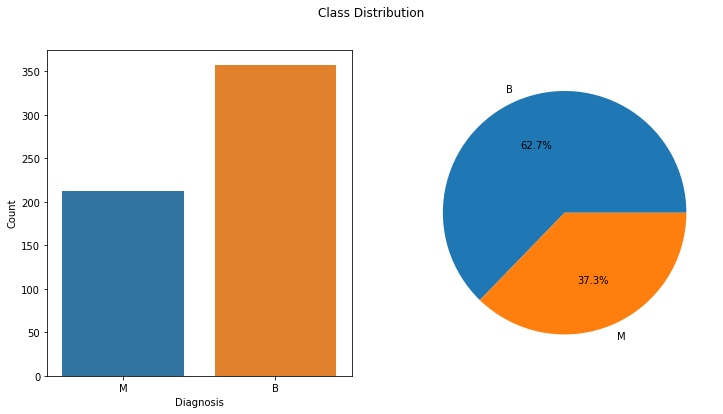

In [117]:
#plotting the classes of the target variable 
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

sns.countplot(x='diagnosis', data=data, ax=axes[0])
plt.pie(diagnosis_count, labels=['B','M'], autopct='%1.1f%%')

fig.suptitle('Class Distribution', fontsize=12)
axes[0].set_xlabel('Diagnosis')
axes[0].set_ylabel('Count')

axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.show()

In [118]:
#Generating descriptive statistics.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [119]:
#Generating a function for plot distribution
def plotDistribution(columns):
    fig, axes=plt.subplots(ncols=2, nrows=len(columns), figsize=(20, 30))
    fig.tight_layout(pad = 4.0)

    for i, column in enumerate(columns):
        sns.distplot(data.loc[data.diagnosis=='M', column], label='Melignant', ax=axes[i][0])
        sns.distplot(data.loc[data.diagnosis=='B', column], label='Benign', ax=axes[i][1])

        for j in range(2):
            axes[i][j].tick_params(axis='x', labelsize=12)
            axes[i][j].tick_params(axis='y', labelsize=12)

        axes[0][0].set_title('Melignant', fontsize=13)
        axes[0][1].set_title('Benign', fontsize=13)


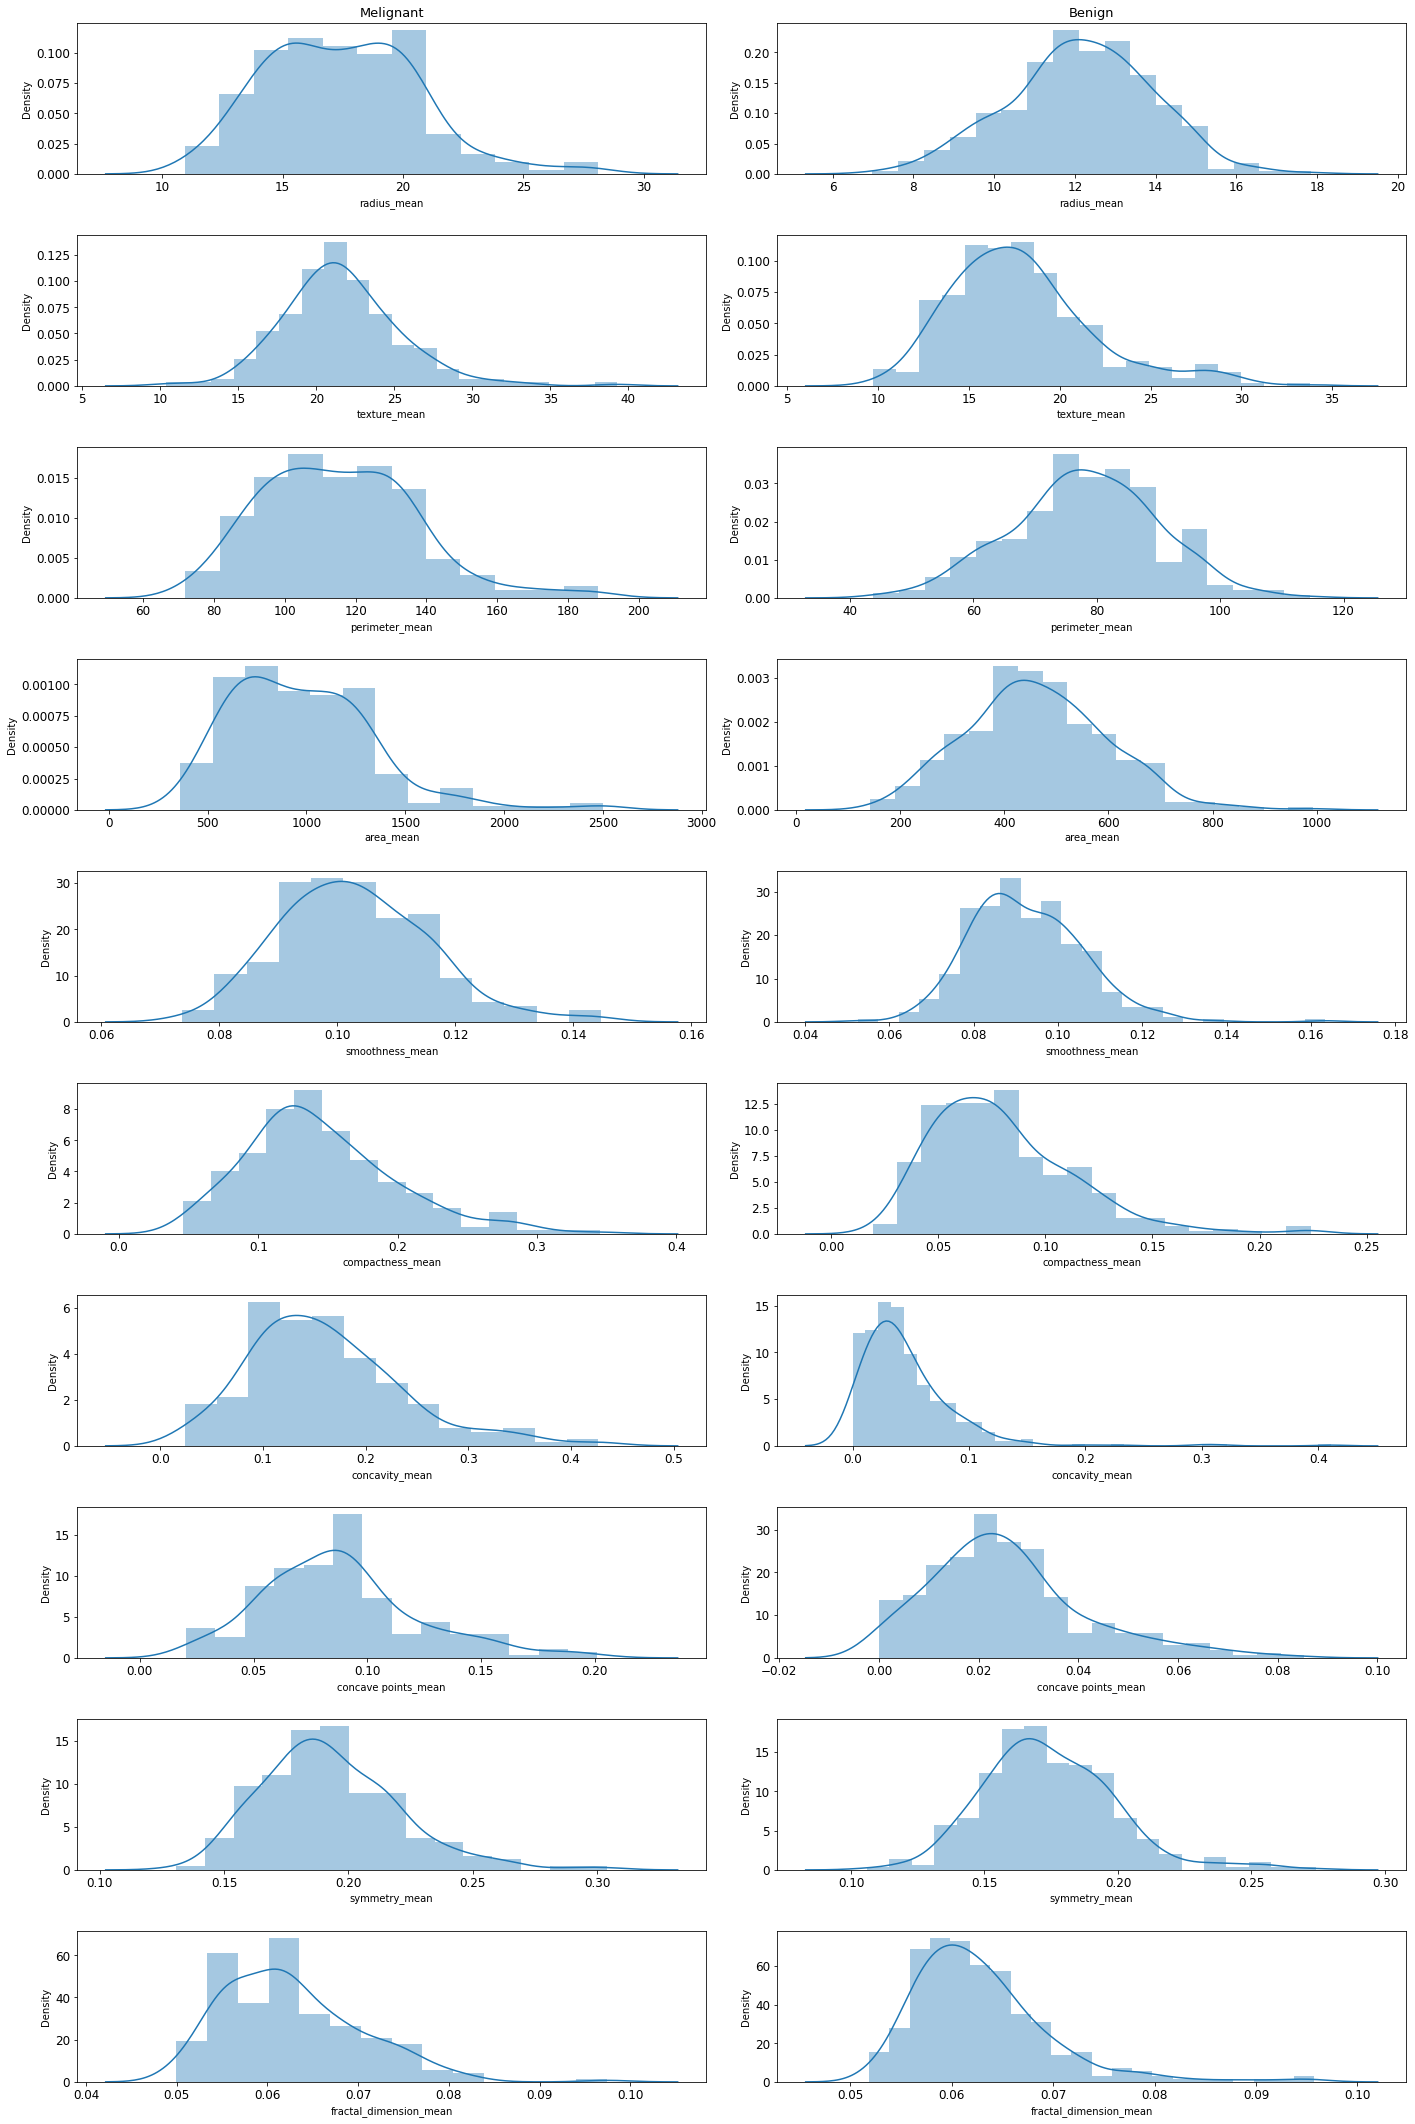

In [120]:
plotDistribution(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])

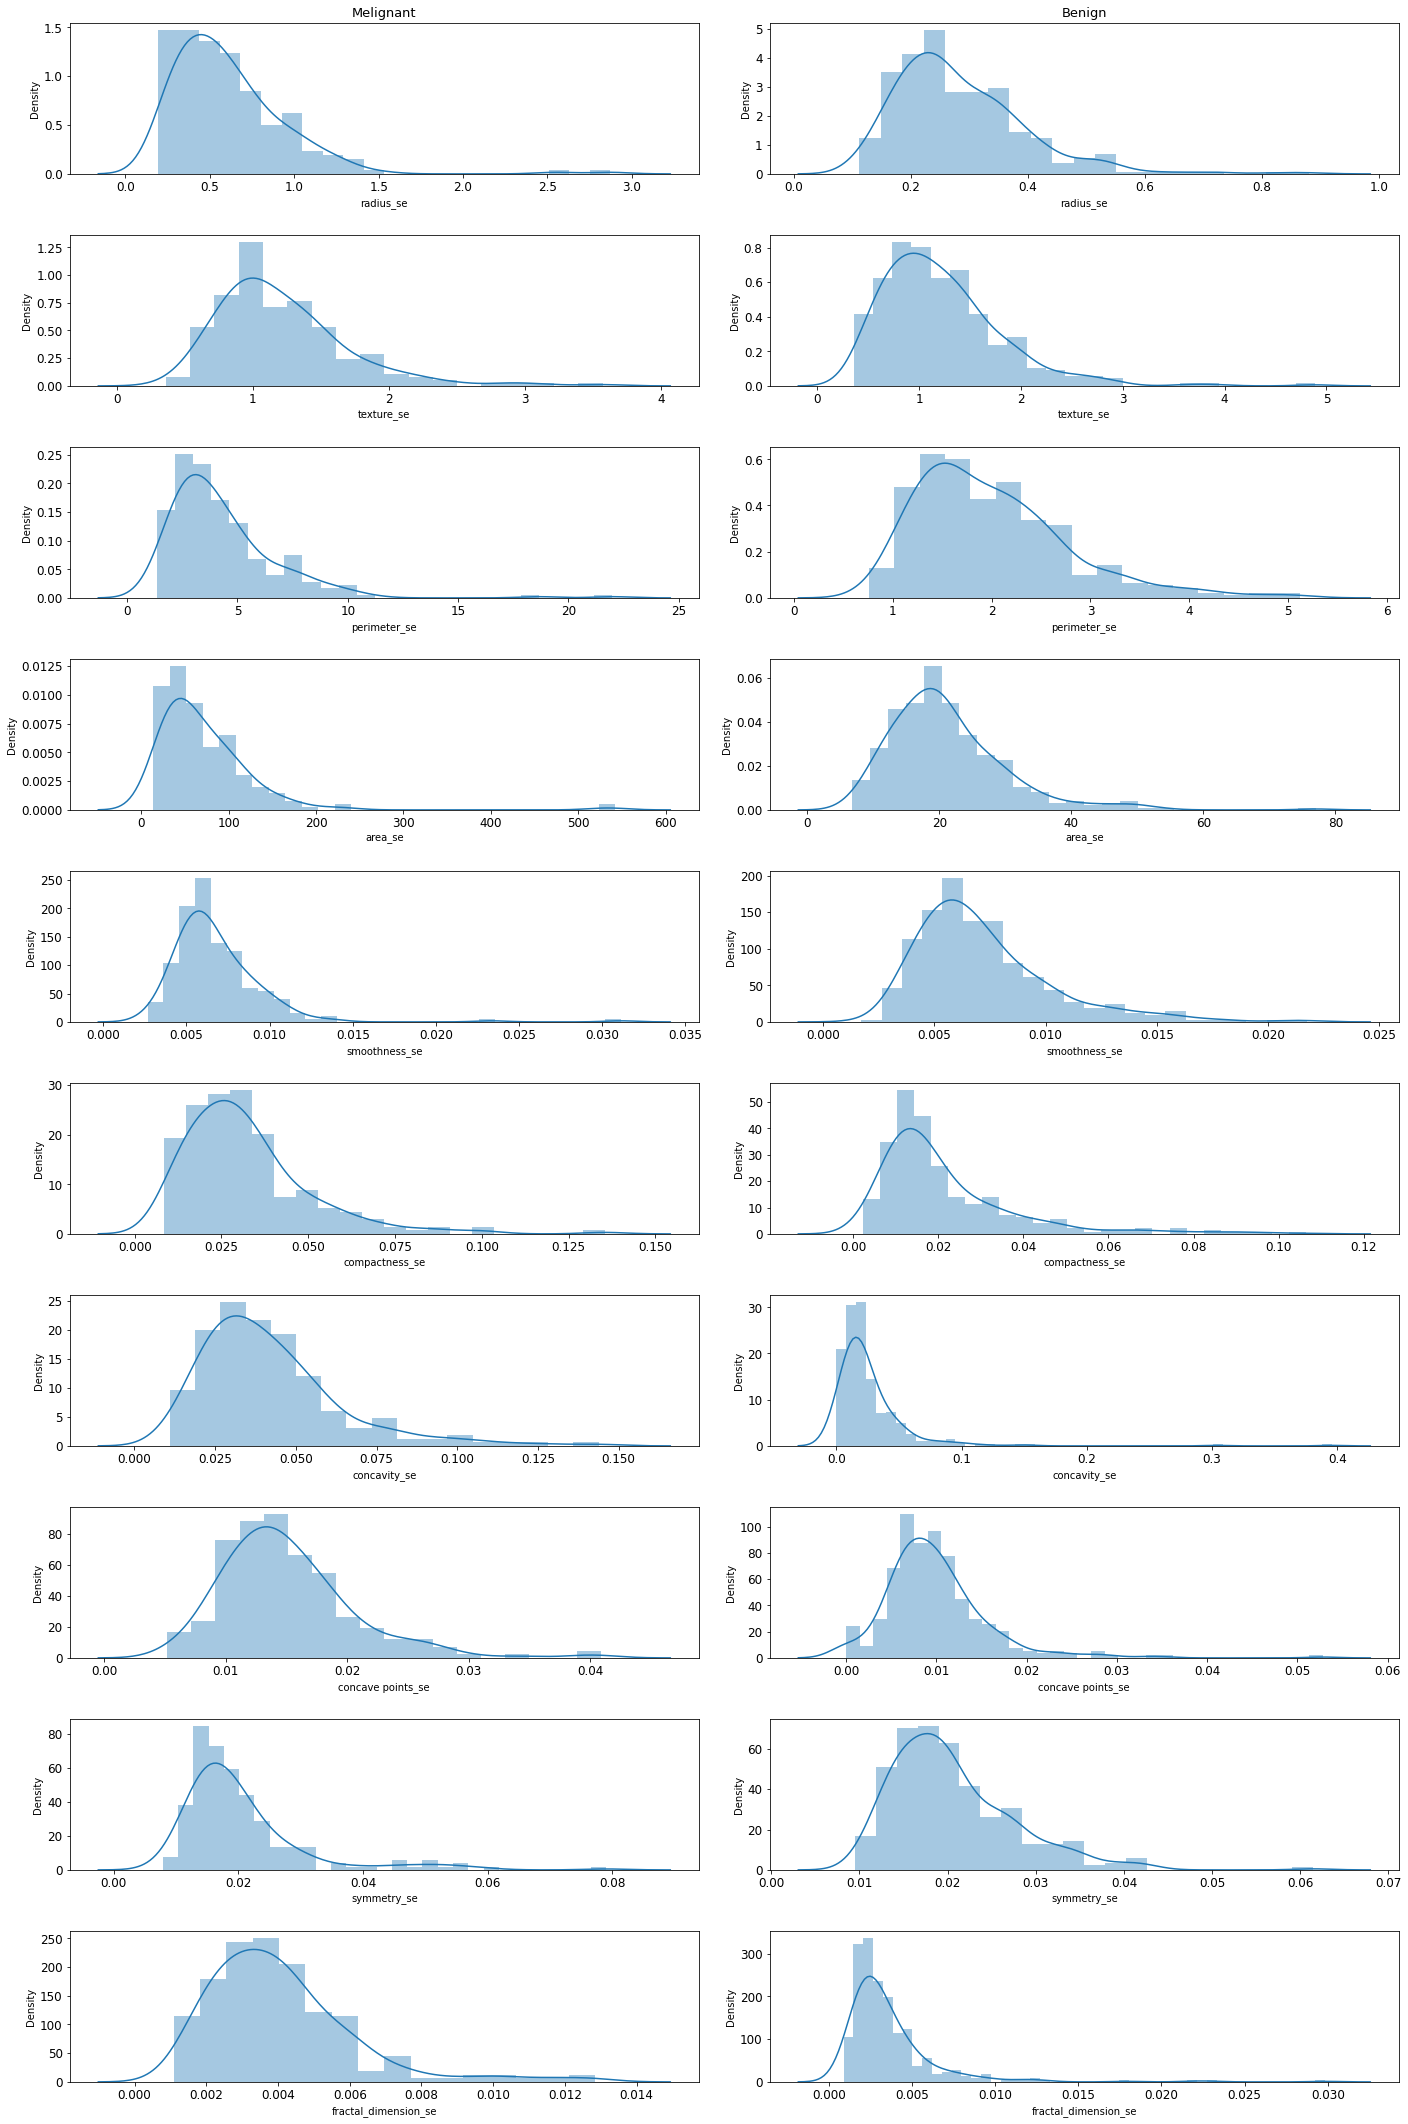

In [121]:
plotDistribution(['radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se'])

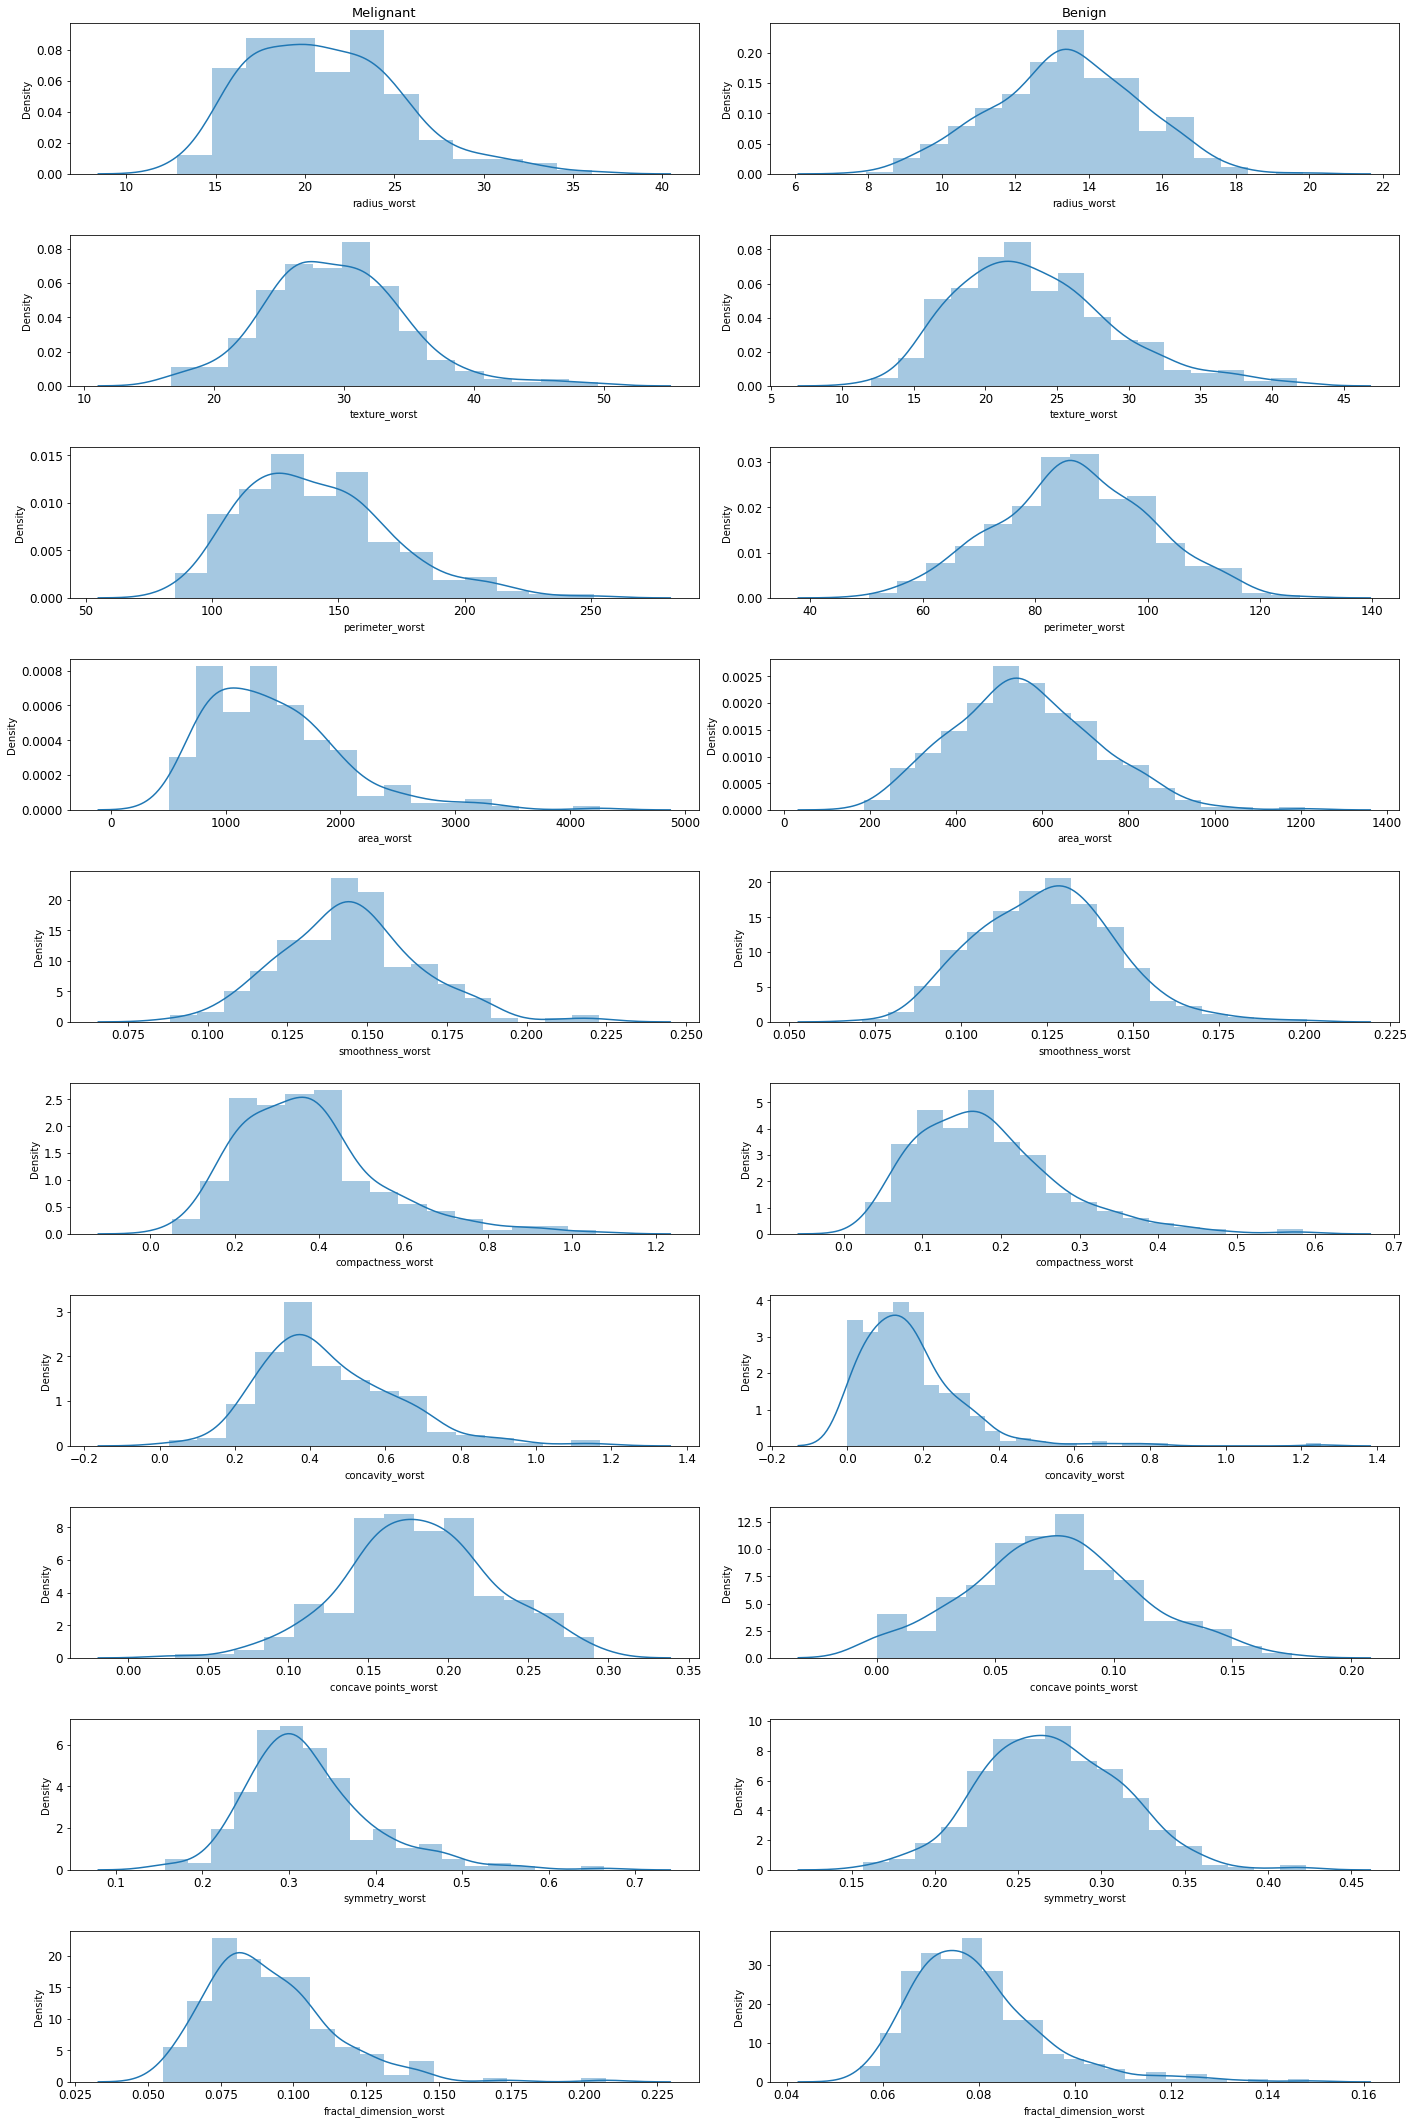

In [122]:
plotDistribution(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'])

According to distribution plots, most of the variables are not normally distributed. However, Logistic Regression doesn't require normally distributed independent variables. On the other hand, most of the variables contain outliters.

Let's draw box plots to further clarify this.

In [123]:
def plotBoxplot(columns, data):
    fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(20,20))
    fig.tight_layout(pad=4.0)

    col = 0
    row = 0
    colors = ['#bad9e9', '#7ab6d6', '#3c8abd']

    for i, column in enumerate(columns):
        sns.boxplot(y=column, data=data, ax=axes[row][col], color=colors[col])

        if (i + 1) % 3 == 0:
            row += 1
            col = 0
        else:
            col += 1

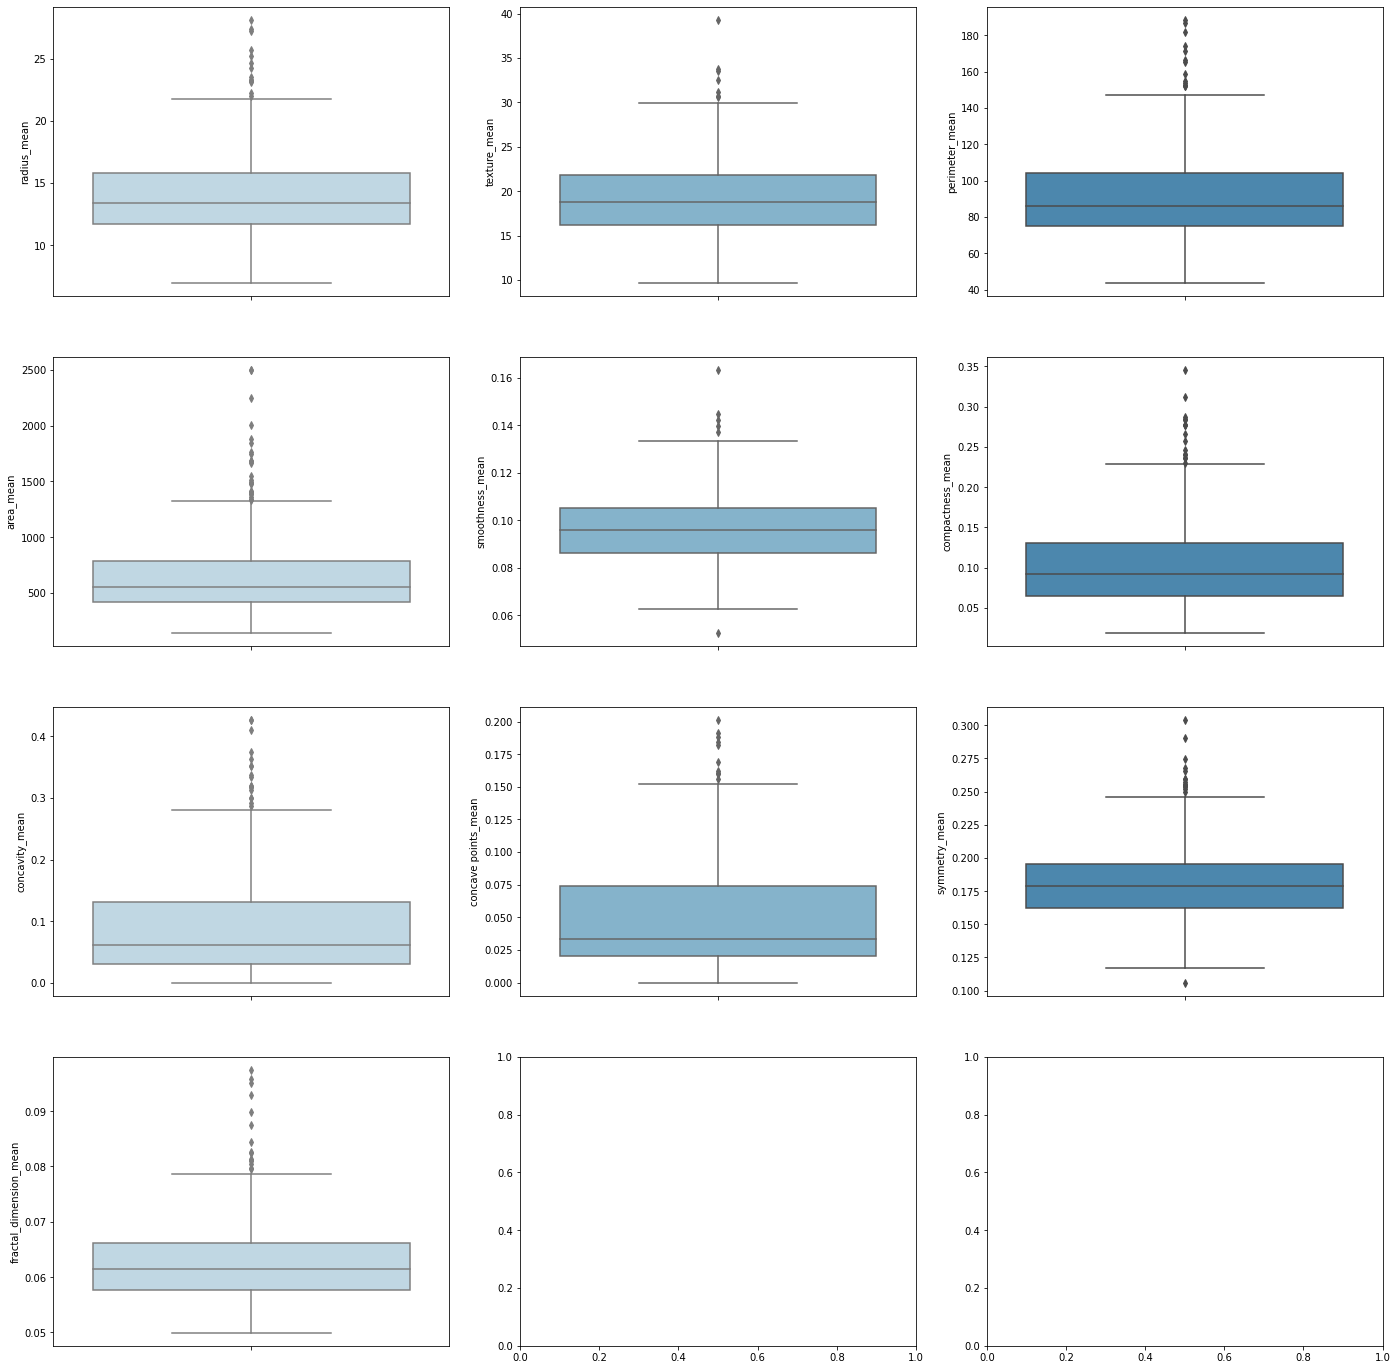

In [88]:
plotBoxplot(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'], data)

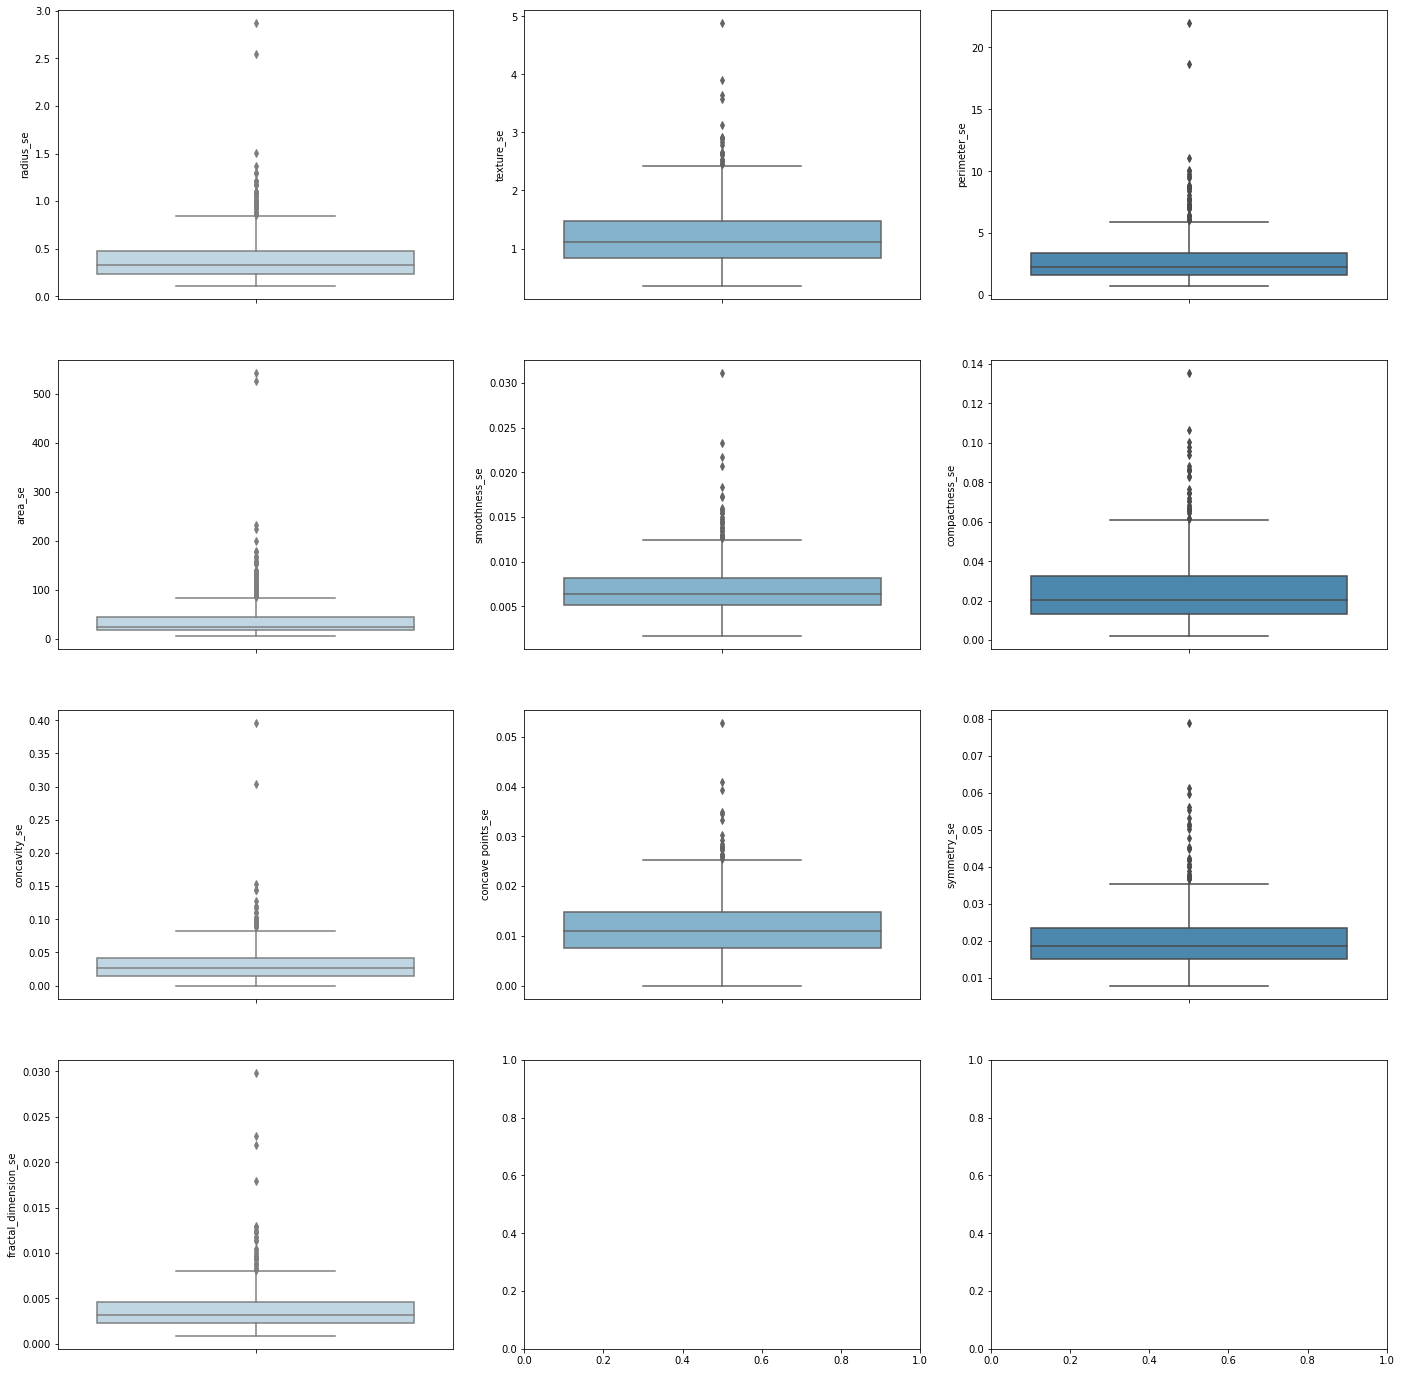

In [89]:
plotBoxplot(['radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se'], data)

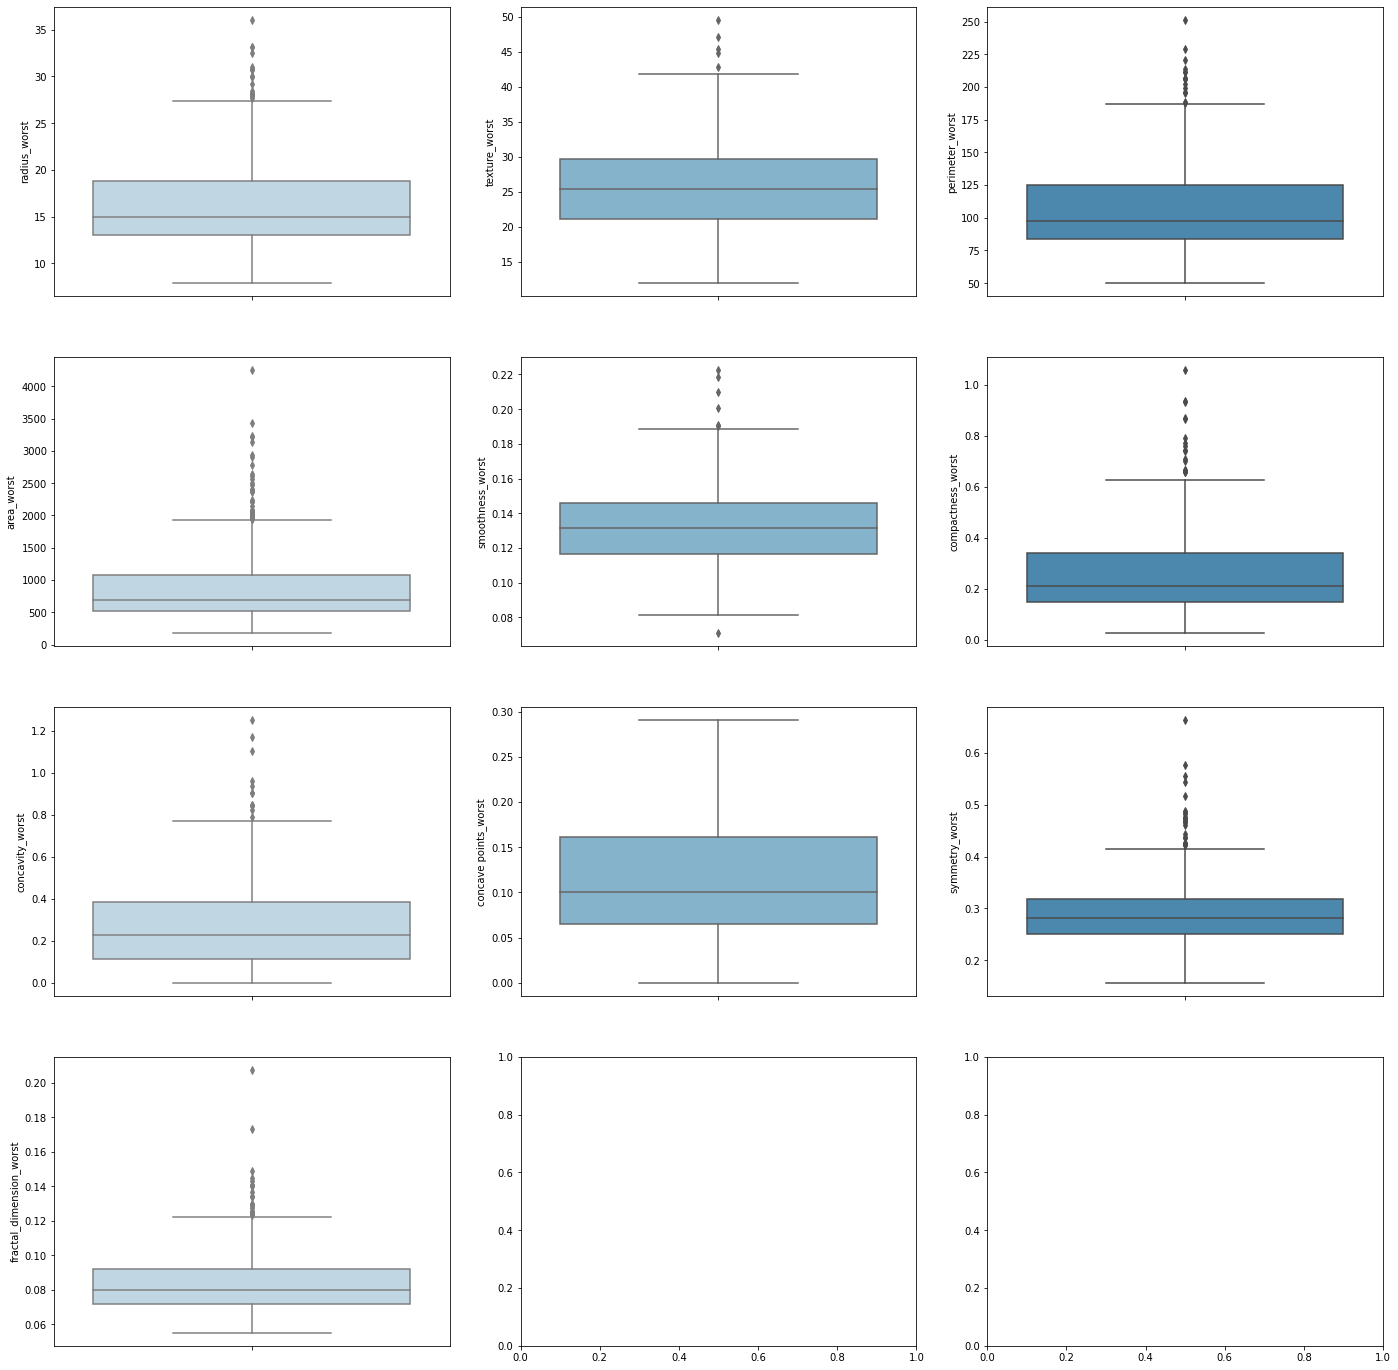

In [90]:
plotBoxplot(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], data)

Logistic regression assumes that there is no severe multicollinearity among the explanatory variables. Multicollinearity occurs when two or more explanatory variables are highly correlated to each other, such that they do not provide unique or independent information in the regression model. If the degree of correlation is high enough between variables, it can cause problems when fitting and interpreting the model. Let's check correlation between features.



In [124]:
corr= data.corr()

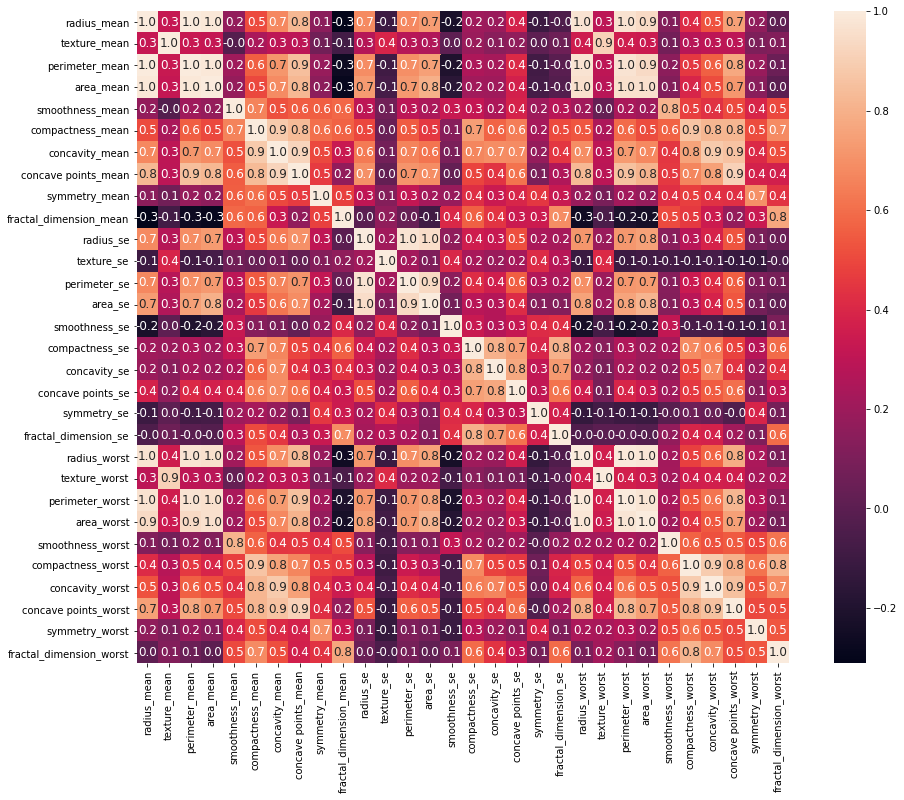

In [125]:
#plotting the correlation between features
plt.figure(figsize=(16,12))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':12})
plt.show()

### **Data Pre-Proecessing**

According to the correlation plot, there are some highly correlated features. The below method select highly correlated features and remove them from the dataset.

**radius_mean**, **perimeter_mean** and **area_mean** are correlated -> we will use **area_mean**

**compactness_mean**, **concavity_mean** and **concave points_mean** are correlated -> we will use **concavity_mean**

**texture_mean** and **texture_worst** are correlated -> we wil use **texture_mean**

**radius_se**, **perimeter_se** and **area_se** are correlated -> we will use **area_se**

**radius_worst**, **perimeter_worst** and **area_worst** are correlated -> we will use **area_worst**

**compactness_se**, **concavity_se** and **concave points_se** are correlated -> we will use **concavity_se**

**compactness_worst**, **concavity_worst** and **concave points_worst** are correlated -> we will use **concavity_worst**

**area_worst** and **area_mean** are correlated -> we will use area_mean
**kalın metin**
**concavity_mean** and **concavity_worst** are correlated -> we will use **concavity_worst**

In [126]:
dataProcessed = data.drop(['diagnosis'], axis=1)

In [127]:
dropList = ['radius_mean', 'perimeter_mean', 'compactness_mean', 'concave points_mean', 'radius_worst','perimeter_worst', 'texture_worst','perimeter_se','radius_se','compactness_se','concave points_se','compactness_worst','concave points_worst', 'area_worst', 'concavity_mean']
dataProcessed = dataProcessed.drop(dropList, axis=1)

In [128]:
dataProcessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   texture_mean             569 non-null    float64
 1   area_mean                569 non-null    float64
 2   smoothness_mean          569 non-null    float64
 3   symmetry_mean            569 non-null    float64
 4   fractal_dimension_mean   569 non-null    float64
 5   texture_se               569 non-null    float64
 6   area_se                  569 non-null    float64
 7   smoothness_se            569 non-null    float64
 8   concavity_se             569 non-null    float64
 9   symmetry_se              569 non-null    float64
 10  fractal_dimension_se     569 non-null    float64
 11  smoothness_worst         569 non-null    float64
 12  concavity_worst          569 non-null    float64
 13  symmetry_worst           569 non-null    float64
 14  fractal_dimension_worst  5

Let's generate the heatmap again. This time we should see less light colors.

In [129]:
corr = dataProcessed.corr()

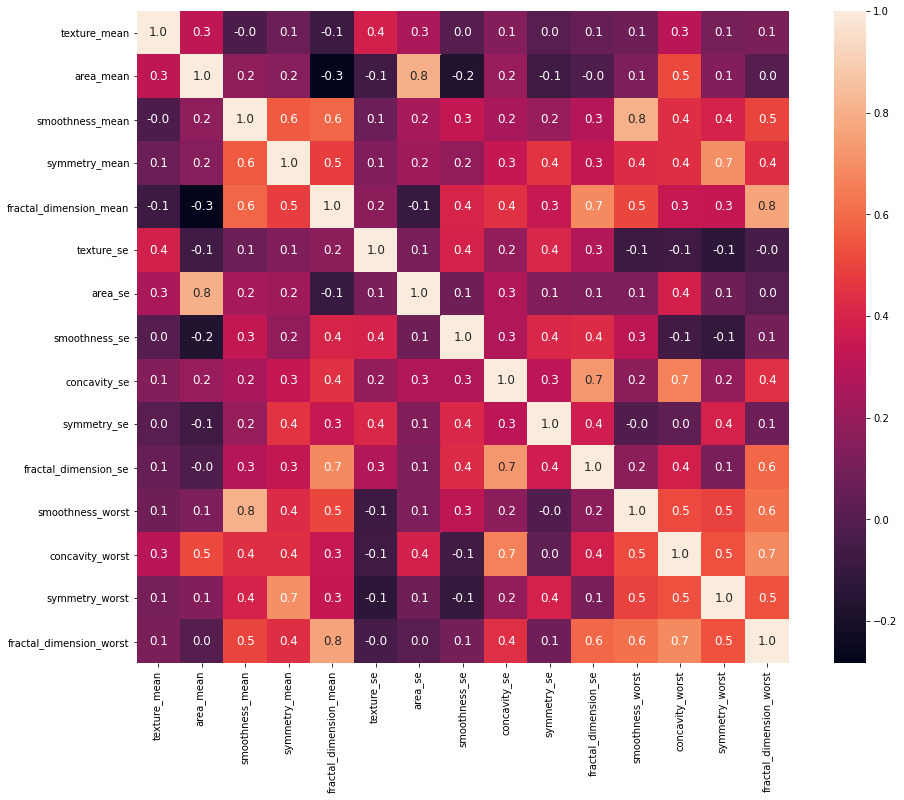

In [130]:
plt.figure(figsize=(16,12))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':12})
plt.show()

After dropping correlated features, we were able to reduce features into 15.

As discussed earlier, there are some outliers in the dataset and Logistic Regression is sensitive to outliers. Therefore, let's treat outliers. There are many different ways to treat outliers, since this dataset is smaller I will use the data imputation technique.

In [131]:
dataProcessed.head()

,texture_mean,area_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [132]:
#Let's convert outliers into missing values to apply data imputation
def outlierLimit(column):
    q1, q3 = np.nanpercentile(column, [25, 75])
    iqr = q3 - q1
    
    upLimit = q3 + 1.5 * iqr
    loLimit = q1 - 1.5 * iqr
    
    return upLimit, loLimit

In [133]:
for column in dataProcessed.columns:
    if dataProcessed[column].dtype != 'object':
        upLimit, loLimit = outlierLimit(dataProcessed[column])
        dataProcessed[column] = np.where((dataProcessed[column] > upLimit) | (dataProcessed[column] < loLimit), np.nan, dataProcessed[column])

We are selecting outliers that above and below the upper limit and lower limit. Then change into missing value if vale is above or lower the limit. 

In [134]:
dataProcessed.isnull().sum()

texture_mean                7
area_mean                  25
smoothness_mean             6
symmetry_mean              15
fractal_dimension_mean     15
texture_se                 20
area_se                    65
smoothness_se              30
concavity_se               22
symmetry_se                27
fractal_dimension_se       28
smoothness_worst            7
concavity_worst            12
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

Now, there are missing values in our dataset. We can treat the missing values using k-Nearest Neighbors.

In [135]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
dataProcessed.iloc[:, :] = imputer.fit_transform(dataProcessed)

In [136]:
dataProcessed.isnull().sum()

texture_mean               0
area_mean                  0
smoothness_mean            0
symmetry_mean              0
fractal_dimension_mean     0
texture_se                 0
area_se                    0
smoothness_se              0
concavity_se               0
symmetry_se                0
fractal_dimension_se       0
smoothness_worst           0
concavity_worst            0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Train-Test Split


In [139]:
#creating independant variable
Y = data_bool['diagnosis']

#creating dependant variable
X = dataProcessed

In [140]:
#train-test split
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=50)

Model Training & Testing

In [141]:
#training the base model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score 
from sklearn.linear_model import LogisticRegression

lrBase = LogisticRegression(random_state=50)
lrBase.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
yPredict = lrBase.predict(xTest)

In [149]:
acc=accuracy_score(yTest, yPredict)
print(f"Accuracy score is: {acc*100}%")

Accuracy score is: 91.81286549707602%


In [151]:
rs=recall_score(yTest, yPredict)
print(f"Recall score is: {rs*100}%")

Recall score is: 94.91525423728814%


Recall is almost 95% and it is a very good result without any optimizations. However, according to the scope of this task, we need to identify cancerous samples as much as possible(true positive). We can check the number of identified patients using a confusion matrix. 

In [152]:
def drawConfusionMatrix(confusion):
    groups = ['TN','FP','FN','TP']

    counts = ['{0:0.0f}'.format(value) for value in confusion.flatten()]
    labels = np.asarray([f'{v1}\n{v2}' for v1, v2 in zip(groups, counts)]).reshape(2, 2)

    sns.heatmap(confusion, annot=labels, cmap='Blues', cbar=False, fmt='')

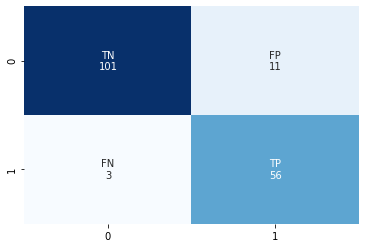

In [153]:
drawConfusionMatrix(confusion_matrix(yTest, yPredict))

According to the result, model has been able to correctly classify 56 samples and incorrectly classify 3 samples as normal.

## **Hyperparameter Tuning**
Grid search is one of the method that can be used for hyperparameter tuning. Therefore, we will fine tune hyperparamters using grid search with 10 fold cross validation.

Here, let's choose three parameters for tuning: solver, penanlty and inverse of regularization strength.

In [154]:
from sklearn.model_selection import GridSearchCV

paramGrid = [{
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['newton-cg', 'bfgs','liblinear', 'sag', 'saga'],
}]

clf = GridSearchCV(estimator=LogisticRegression(), scoring='accuracy', param_grid=paramGrid, cv=10, verbose=True, n_jobs=-1)
bestClf = clf.fit(xTrain, yTrain)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   11.6s finished


In [155]:
bestClf.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
bestClf.best_score_


0.9548717948717949

Results clearly shows that model has been improved, altough it is a small improvement. Let's train the model again with these selected parameters.

In [162]:
lrOptimized = LogisticRegression(C=100, solver='newton-cg', random_state=50, penalty='l2')
lrOptimized.fit(xTrain, yTrain)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
yOptimized = lrOptimized.predict(xTest)

In [164]:
acc_opt=accuracy_score(yTest, yOptimized)
print(f"Accuracy score is: {acc_opt*100}%")

Accuracy score is: 93.56725146198829%


In [165]:
rs_opt=recall_score(yTest, yOptimized)
print(f"Recall score is: {rs_opt*100}%")

Recall score is: 91.52542372881356%


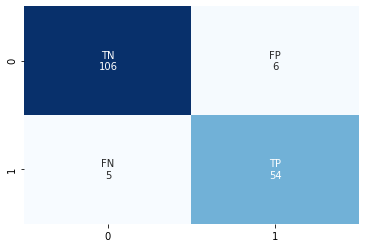

In [166]:
drawConfusionMatrix(confusion_matrix(yTest, yOptimized))

According to the result, model has correctly classified 54 cases and incorrectly classified 5 cases as normal. When compare with base model, we can see that results have not been improved and model has not been able to reduce false negative.